### Student Information
Name: Manuel Giambi

Student ID: 109065430

GitHub ID: HikariNoMJ14

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

import helpers.data_mining_helpers as dmh

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [2]:
# Fetch every 5th 'category' and display the last 10
a = X['category'].loc[::5][-10:]
b = X.loc[::5, 'category'][-10:]
c = X[::5][-10:]['category']
d = X.category.loc[::5][-10:]
e = X.iloc[::5, 1][-10:]
f = X.loc[X.index % 5 == 0, 'category'][-10:]
g = X.iloc[range(0,len(X), 5), pow(2,0)][-10:]

In [3]:
if a.equals(b) and b.equals(c) and c.equals(d) and d.equals(e) and e.equals(f) and f.equals(g):
    print("All expressions are equivalent")

All expressions are equivalent


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [4]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df.isnull()

,id,missing_example
0,False,True
1,False,True
2,False,False
3,False,False
4,False,True
5,False,False


In [5]:
NA_df['missing_example'].apply(type)

0       <class 'float'>
1       <class 'float'>
2         <class 'str'>
3         <class 'str'>
4    <class 'NoneType'>
5         <class 'str'>
Name: missing_example, dtype: object

As shown on the cell output above, the cells that have not been identified as `True` by `pd.isnull` are of type `str`. Also, we can see that although `pd.isnull` outputs `True` for both `np.nan` and  `None`, Pandas preserves the type that was initially input into the dictionary. If we don't supply value for `missing_example` to the dictionary (as in row with id `B`) we can see that Pandas automatically adds a `np.nan` cell to the DataFrame; from this we can assume this is Pandas' preferred representation for missing values.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [6]:
X_sample = X.sample(n=1000)

In [7]:
pd.set_option('display.width', 700)
print("Full dataset")
print(X.head())
print(X.shape)
print('------------')
print("Sample")
print(X_sample.head())
print(X_sample.shape)
print('------------')

Full dataset
                                                text  category           category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1           comp.graphics
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1           comp.graphics
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3  soc.religion.christian
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3  soc.religion.christian
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3  soc.religion.christian
(2257, 3)
------------
Sample
                                                   text  category           category_name
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1           comp.graphics
1886  From: sun075!Gerry.Palo@uunet.uu.net (Gerry Pa...         3  soc.religion.christian
1142  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2                 sci.med
114   From: jbulf@balsa.Berkeley.EDU (Jeff Bulf) Sub...         1          

The first thing we can notice is that of course the dataframe contains less records. Also we can see that the index is not sorted anymore, and it doesn't contain all values; this means that we can't use `.iloc` and `.loc` interchangeably for rows anymore.

In [8]:
print("Full dataframe")
X_cat_dist = X['category'].value_counts()
print(X_cat_dist)
print(f"Standard deviation: {np.std(X_cat_dist)}")

Full dataframe
3    599
2    594
1    584
0    480
Name: category, dtype: int64
Standard deviation: 48.940652835858245


In [9]:
X_sample_cat_dist = X_sample['category'].value_counts()
print(X_sample_cat_dist)
print(f"Standard deviation: {np.std(X_sample_cat_dist)}")

2    268
3    267
1    249
0    216
Name: category, dtype: int64
Standard deviation: 21.03568396796263


If we look at the distribution of the different categories, we can see that in `X_sample` the standard deviation decreased, leading to a higher balance between classes.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

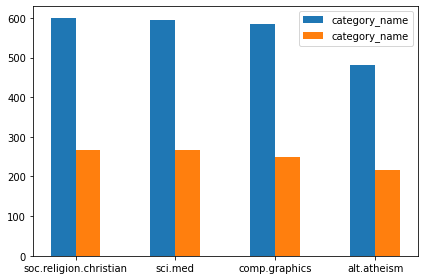

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(len(X.category_name.value_counts()))
width = 0.25
max_y = X.category_name.value_counts().max()

fig, ax = plt.subplots()
ax.set_xticks(x)
ax.set_xticklabels(X.category_name.value_counts().index)
ax.bar(x=x - width/2, height=X.category_name.value_counts(), width=width, label='category_name')
ax.bar(x=x + width/2, height=X_sample.category_name.value_counts(),  width=width, label='category_name')
fig.tight_layout()
ax.legend()
plt.show()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [11]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
feature_names = count_vect.get_feature_names()
X_counts_array = X_counts[0:5, 0:100].toarray()

def get_word(array, index):
    ones = np.where(array == 1)[0]
    return feature_names[ones[index]]

get_word(X_counts_array[4], index=1)

'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

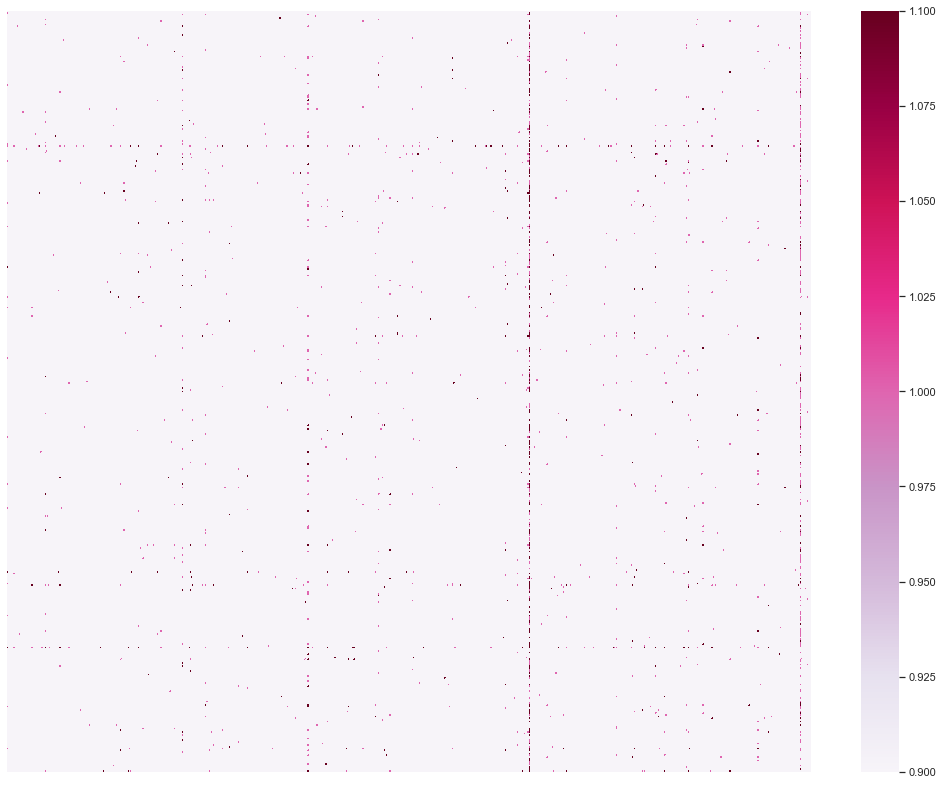

In [12]:
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()]
plot_y = ["doc_"+ str(i) for i in list(X.index)]
plot_z = X_counts.toarray()
df_todraw = pd.DataFrame(plot_z[::5,::50], columns = plot_x[::50], index = plot_y[::5])
plt.subplots(figsize=(18, 14))
sns.set(rc={},style="dark")
ax = sns.heatmap(data=df_todraw,
                 cmap="PuRd", xticklabels=False, yticklabels=False, annot=False,
                 vmin=1, vmax=1)

Visualizing such a big matrix is next to impossible, and to make it more manageable we can downsample it. We are going to lose some information, but we can still get some nice high-level overview of the data we're dealing with.
This visualization gives us an idea of the sparsity of the matrix; we can also see that some term appears in many documents, while others are much rarer.

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

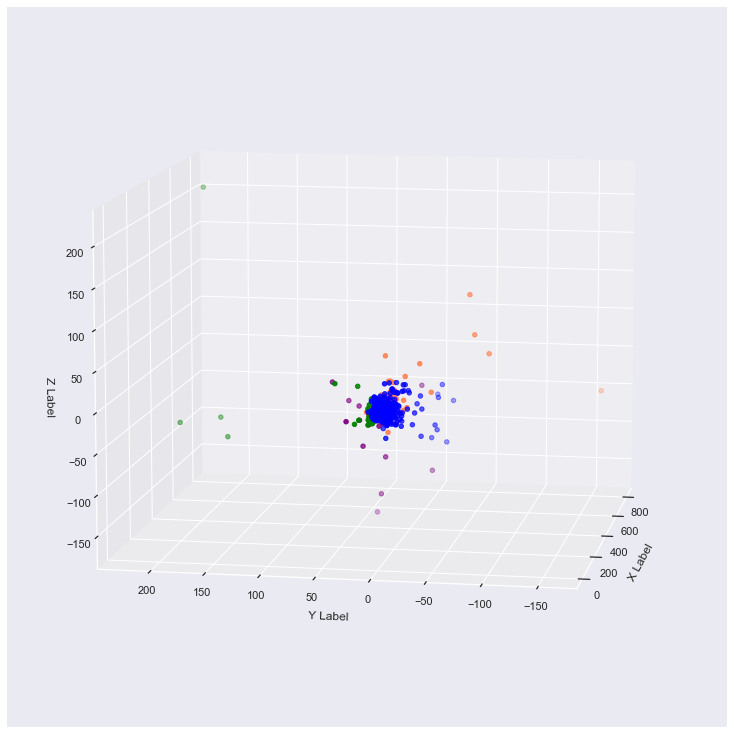

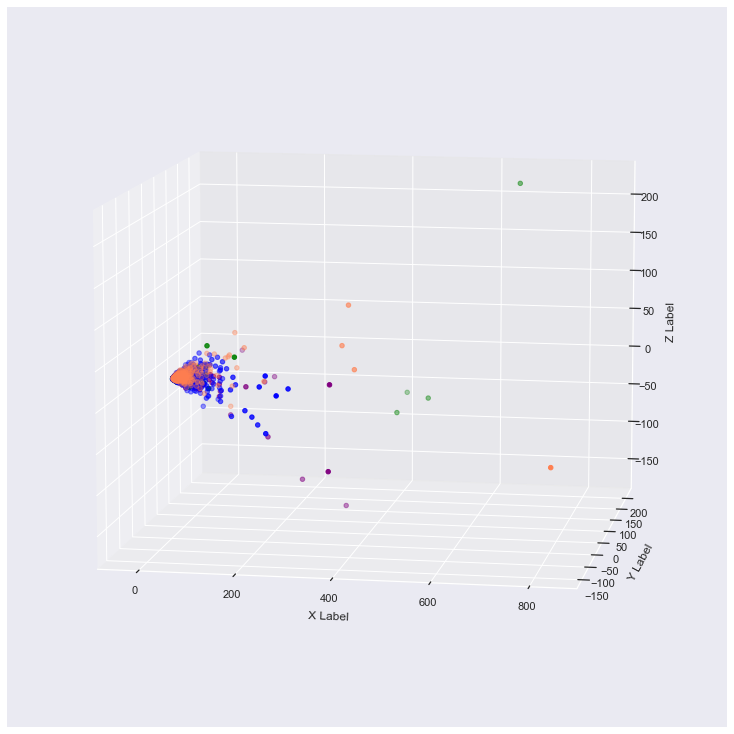

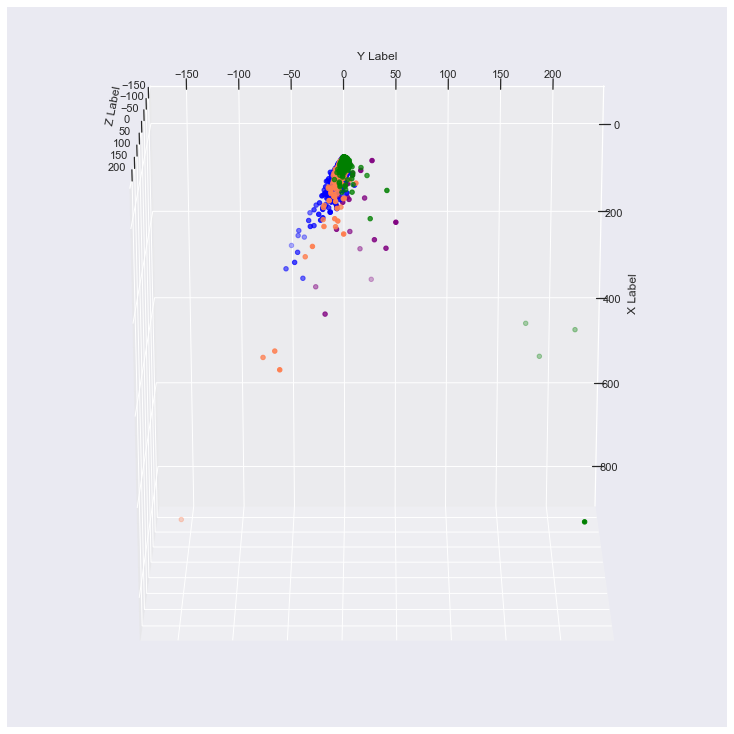

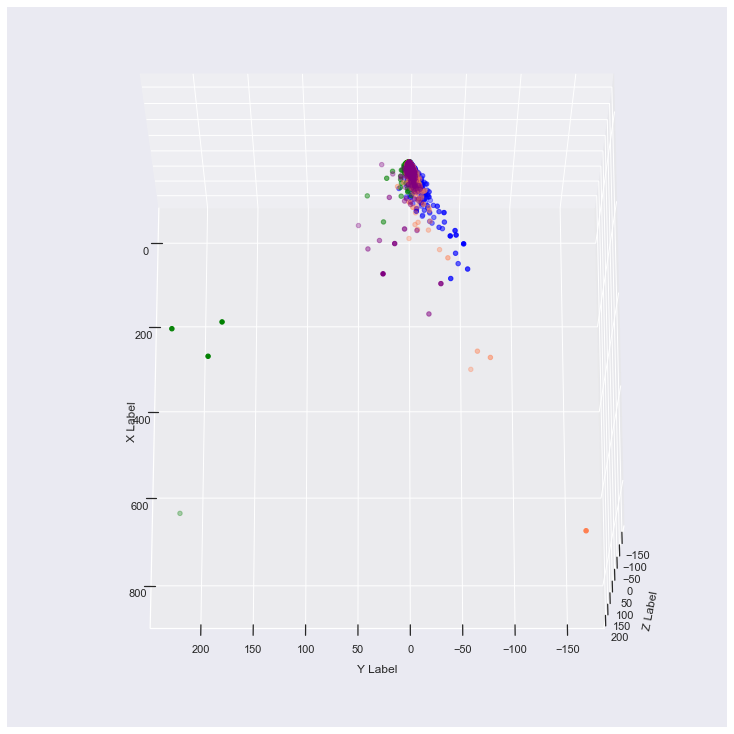

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

def make_3d_plot(data, elev, azim):
    col = ['coral', 'blue', 'green', 'purple']

    # plot
    fig = plt.figure(figsize = (25,10))
    ax = Axes3D(fig)

    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]

        ax.scatter(xs, ys, zs, c = c, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')

    ax.view_init(elev=elev, azim=azim)
    plt.show()

make_3d_plot(X_reduced, 10, 190)
make_3d_plot(X_reduced, 10, 280)
make_3d_plot(X_reduced, 110, 0)
make_3d_plot(X_reduced, 290, 0)

Using 3 dimensions instead of 2 makes the plot less messy, and plotting the 3d scatterplot using different angles we can better appreciate the separation between the classes. For each of the 4 angles I chose, we can clearly see that one color stands out. Choosing a rotation angle that isn't orthogonal to any of the axes allows us to see for which values of X,Y or Z a certain category dominates (e.g. blue points are concentrated in lower values of X).
We can also see that most of the data is concentrated in one area, with a few outliers clearly separated into different regions. It would be interesting to identify the outliers and remove them from the visualization, so we can zoom in on the denser area; this might give us further insight.

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [14]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [15]:
import plotly.express as px
frequency_df = pd.DataFrame(data=term_frequencies, columns=['frequency'])
frequency_df['terms'] = count_vect.get_feature_names()

fig.update_layout(
    xaxis = dict(
        range=(0,50)
    )
)
fig.show()

AttributeError: 'Figure' object has no attribute 'update_layout'

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [ ]:
frequency_reduced_df = frequency_df[frequency_df['frequency'] > 100]

fig = px.bar(frequency_reduced_df, x='terms', y='frequency')
fig.update_layout(
    xaxis = dict(
        range=(0,50)
    )
)
fig.show()

The choice of removing terms with frequency lower than 100 is arbitrary. It would make more sense to remove stopwords from the visualization, although that should have bee ndone upstream in the exploration.

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [ ]:
fig = px.bar(frequency_reduced_df.sort_values('frequency', ascending=False), x='terms', y='frequency')
fig.update_layout(
    xaxis = dict(
        range=(0,30)
    )
)
fig.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

The binarization seems to work when using `category_name`, as long as the same column is used both in the `fit` and the `transform` method.

### >>> **Part 2**